# White Box - Supervised ML Project
__Name:__ Abdulrahman Abdulla Alali

__Topic Name:__ Credit Score Prediction using Logistic Regression and KNN

## Introduction

### Business Challenge
A large global finance bank aims to improve the accuracy and fairness of its **credit scoring process**.  
Currently, creditworthiness is assessed manually by analysts, which can introduce **human bias**, **inconsistency**, and **inefficiency**.  

To address this, the bank seeks to develop a **white-box (explainable)** machine learning model that can automatically classify customers into credit score categories such as **Good**, **Standard**, or **Poor**.  
The goal is to standardize credit evaluation, reduce processing time, and improve the reliability of lending decisions.

### Dataset Overview
The dataset used in this project — *Credit Score Classification Dataset* from Kaggle — contains **100,000 records** of customer financial and behavioral data.  
Each record includes features such as:
- **Age**, **Annual Income**, and **Monthly In-hand Salary**
- **Outstanding Debt**, **Credit Utilization Ratio**
- **Number of Bank Accounts**, **Loans**, and **Credit Inquiries**
- **Payment Behavior**, **Delay from Due Date**, and **Credit Limit Changes**

The target variable, **Credit_Score**, is a categorical label with three classes:
- **Good**
- **Standard**
- **Poor**

## Problem Statement

Financial institutions rely heavily on accurate credit scoring to determine a customer’s ability to repay loans and manage credit responsibly.  
However, traditional methods of credit scoring are often **manual**, **subjective**, and **inconsistent** — leaving room for **human bias** and **error** in loan approvals.

This project aims to build a **machine learning-based credit score classification system** that can:
- Automatically classify customers into **Good**, **Standard**, or **Poor** credit categories.
- Provide a **transparent (white-box)** model that financial analysts can interpret and trust.
- Improve the efficiency and fairness of the credit evaluation process.

By analyzing a wide range of customer financial and behavioral data — including income, debt, repayment behavior, and credit utilization — the model seeks to help the bank:
- **Reduce manual assessment time**
- **Increase decision accuracy**
- **Minimize risk exposure** from lending to high-risk individuals
- **Enhance customer experience** through faster, data-driven evaluations



### Objective
To build and compare two interpretable classification models — **Logistic Regression** and **K-Nearest Neighbors (KNN)** — each tested with:
- A **3-feature model** (key behavioral indicators)
- A **5-feature model** (including financial capacity indicators)

The models are evaluated using:
- **Accuracy**, **Precision**, **Recall**, **F1-score**, and **Confusion Matrix**
  
Through this, we aim to identify which model and feature combination best predicts credit scores while maintaining interpretability for business stakeholders.

## Data Overview
__Load and inspect the dataset__
- Source and format
- .head(), .info(), .describe(),…


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Load dataset
df = pd.read_csv("train.csv")
df.head()

C:\Users\ha7al\AppData\Local\Temp\ipykernel_20920\3457575347.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
# Basic info
print("Shape:", df.shape)
print("\nMissing values per column:\n", df.isnull().sum())

Shape: (100000, 28)

Missing values per column:
 ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0

In [5]:
df.describe(include='all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,84998.000000,100000.000000,...,100000,100000,100000.000000,90970,100000,100000.000000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,NaN,NaN,...,4,13178,NaN,404,3,NaN,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,NaN,NaN,...,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,NaN,NaN,...,36479,24,NaN,446,52326,NaN,4305,25513,9,53174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4194.170850,17.091280,...,NaN,NaN,32.285173,NaN,NaN,1403.118217,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.686167,117.404834,...,NaN,NaN,5.116875,NaN,NaN,8306.041270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,...,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.568229,3.000000,...,NaN,NaN,28.052567,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.745000,6.000000,...,NaN,NaN,32.305784,NaN,NaN,69.249473,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957.448333,7.000000,...,NaN,NaN,36.496663,NaN,NaN,161.224249,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

## Data Cleaning
__Handle missing values, outliers, and inconsistencies__
- Rename columns
- Fix data types
- Document assumptions


First we change the columns data types

In [7]:
# Since there are charachters in some columns first we will clean them then we will convert 
cols_to_numeric = [
    'Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
    'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in cols_to_numeric:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace('[^0-9.-]', '', regex=True)  # remove non-numeric characters
        .replace('', '0')                         # replace empty strings with 0
        .astype(float)
    )

In [8]:
# Confirming
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

Now we deal with the missing values

In [9]:
# Numeric columns — using mean
df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].mean(), inplace=True)
df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].mean(), inplace=True)
df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].mean(), inplace=True)
df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].mean(), inplace=True)
df['Monthly_Balance'].fillna(df['Monthly_Balance'].mean(), inplace=True)

In [10]:
# Categorical columns
df['Name'].fillna('Unknown', inplace=True)
df['Type_of_Loan'].fillna('Not Specified', inplace=True)
df['Credit_History_Age'].fillna('Unknown', inplace=True)

In [13]:
# Verify no missing values remain
print("Remaining missing values:\n", df.isnull().sum().sort_values(ascending=False).head(10))

Remaining missing values:
 ID                          0
Customer_ID                 0
Monthly_Balance             0
Payment_Behaviour           0
Amount_invested_monthly     0
Total_EMI_per_month         0
Payment_of_Min_Amount       0
Credit_History_Age          0
Credit_Utilization_Ratio    0
Outstanding_Debt            0
dtype: int64


## Exploratory Data Analysis (EDA)
### Analysis
__Answer objectives using visual and statistical insights__
- Trends, relationships, anomalies
- Outlier and missing values treatment
- Univariate, bivariate, or multivariate analysis
    - Histograms, box plots, bar charts
    - Correlation matrix for continuous columns (required if applicable)


#### Now for EDA
Before selecting the most relevant features for our models, we’ll perform some exploratory analysis to understand:
- The distribution of our target variable (`Credit_Score`).
- The relationships between numerical features and the target.
- The correlations among numerical features.

This will help us decide which columns are most predictive for credit score classification.


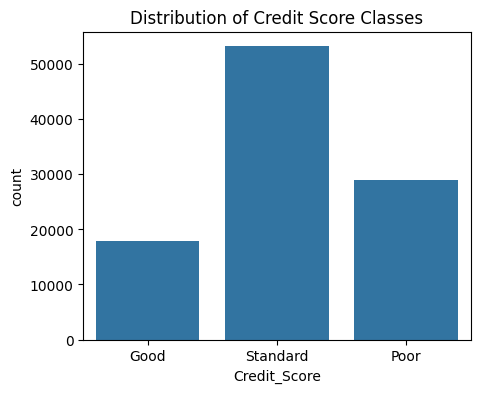

In [14]:
# Distribution of the target (Credit_Score)
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Credit_Score')
plt.title("Distribution of Credit Score Classes")
plt.show()

We’ll now look at the basic descriptive statistics for numeric columns
to understand their ranges, means, and spread.

In [15]:
# Numeric summary
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,28.758090,10.171791,27.754251,1426.220376,32.285173,1403.118217,608.863270,-3.000000e+22
std,686.244717,1.429618e+06,2935.176493,117.404834,129.05741,466.422621,62.647879,14.860104,218.117625,6.880628,191.269936,1155.129026,5.116875,8306.041270,2001.382002,3.162151e+24
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.945750e+04,1792.084167,3.000000,4.00000,8.000000,1.000000,10.000000,8.000000,4.970000,3.000000,566.072500,28.052567,30.306660,67.431711,2.678714e+02
50%,33.000000,3.757861e+04,3852.736667,6.000000,5.00000,13.000000,3.000000,18.000000,13.000000,9.250000,6.000000,1166.155000,32.305784,69.249473,128.698239,3.348066e+02
75%,42.000000,7.279092e+04,5371.525000,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.660000,9.000000,1945.962500,36.496663,161.224249,255.038698,4.676706e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


### Correlation Heatmap

We’ll plot the correlation between numeric features to identify strong relationships.
Features that are more correlated with `Credit_Score` or financial behavior indicators 
are likely to be more useful for our models.


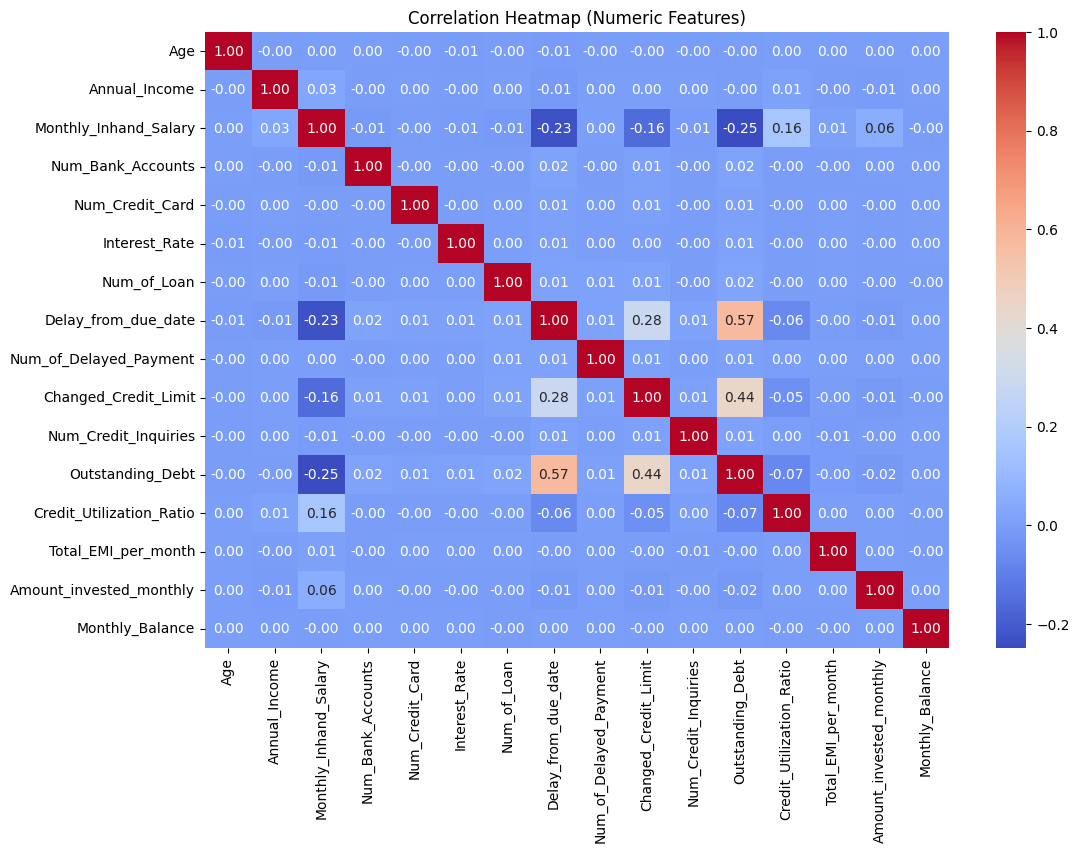

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df.corr(numeric_only=True),
    cmap='coolwarm',
    annot=True,         
    fmt=".2f",          
)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [21]:
df.corr(numeric_only=True)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,-0.000533,0.002789,0.002466,-0.001791,-0.005667,-0.001273,-0.009681,-0.002415,-0.002135,-0.002003,-0.001995,0.002774,0.000662,0.003428,0.001043
Annual_Income,-0.000533,1.000000,0.028198,-0.004627,0.001250,-0.002908,0.001464,-0.010631,0.001045,0.000083,0.003125,-0.003706,0.010316,-0.000248,-0.005026,0.000818
Monthly_Inhand_Salary,0.002789,0.028198,1.000000,-0.009851,-0.004630,-0.005950,-0.009839,-0.230526,0.000876,-0.157003,-0.008111,-0.248724,0.159586,0.006694,0.055195,-0.000630
Num_Bank_Accounts,0.002466,-0.004627,-0.009851,1.000000,-0.002216,-0.003998,-0.000679,0.015966,-0.003518,0.007514,-0.001666,0.015548,-0.001365,-0.001433,0.003068,0.001058
Num_Credit_Card,-0.001791,0.001250,-0.004630,-0.002216,1.000000,-0.004012,0.001421,0.008715,0.004700,0.005915,-0.003432,0.005626,-0.003341,0.000768,-0.002163,0.001268
Interest_Rate,-0.005667,-0.002908,-0.005950,-0.003998,-0.004012,1.000000,0.000614,0.009792,0.002784,0.000223,-0.001664,0.010721,-0.000359,0.002517,-0.001056,0.001248
Num_of_Loan,-0.001273,0.001464,-0.009839,-0.000679,0.001421,0.000614,1.000000,0.012625,0.010032,0.014686,-0.000490,0.023772,-0.003967,0.001554,-0.001163,-0.000032
Delay_from_due_date,-0.009681,-0.010631,-0.230526,0.015966,0.008715,0.009792,0.012625,1.000000,0.012159,0.284409,0.011394,0.571713,-0.063796,-0.003889,-0.012209,0.004442
Num_of_Delayed_Payment,-0.002415,0.001045,0.000876,-0.003518,0.004700,0.002784,0.010032,0.012159,1.000000,0.006934,0.002523,0.009672,0.001109,0.001145,0.001384,0.000830
Changed_Credit_Limit,-0.002135,0.000083,-0.157003,0.007514,0.005915,0.000223,0.014686,0.284409,0.006934,1.000000,0.006008,0.443653,-0.048217,-0.001103,-0.010735,-0.002401


### Boxplots: Feature vs Credit Score

Next, we visualize how numeric features vary across different credit score categories.
This will help us identify which features show clear separation between credit score classes.


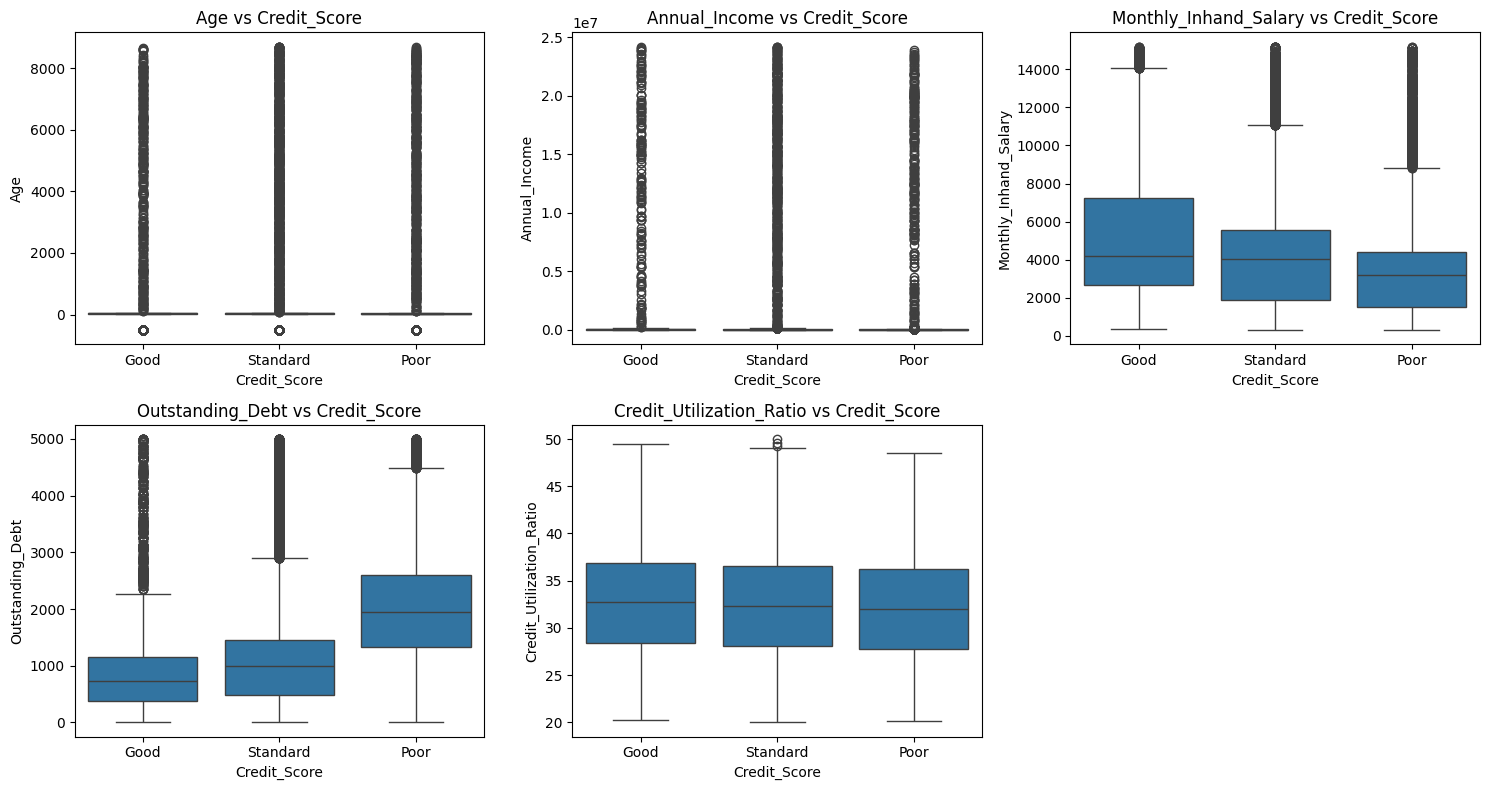

In [22]:
num_features_to_plot = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
    'Outstanding_Debt', 'Credit_Utilization_Ratio'
]

plt.figure(figsize=(15,8))
for i, col in enumerate(num_features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='Credit_Score', y=col)
    plt.title(f'{col} vs Credit_Score')

plt.tight_layout()
plt.show()


### Correlation Insights

In this section, we’ll explore relationships between key numeric variables in the dataset using correlation analysis.
This helps identify which features are most informative and which are redundant or weakly related.


In [24]:
corr_matrix = df.corr(numeric_only=True)
top_corr = corr_matrix.unstack().sort_values(ascending=False)

# Drop self-correlations
top_corr = top_corr[top_corr < 1]

top_corr.head(15)


Outstanding_Debt          Delay_from_due_date         0.571713
Delay_from_due_date       Outstanding_Debt            0.571713
Changed_Credit_Limit      Outstanding_Debt            0.443653
Outstanding_Debt          Changed_Credit_Limit        0.443653
Delay_from_due_date       Changed_Credit_Limit        0.284409
Changed_Credit_Limit      Delay_from_due_date         0.284409
Monthly_Inhand_Salary     Credit_Utilization_Ratio    0.159586
Credit_Utilization_Ratio  Monthly_Inhand_Salary       0.159586
Monthly_Inhand_Salary     Amount_invested_monthly     0.055195
Amount_invested_monthly   Monthly_Inhand_Salary       0.055195
Annual_Income             Monthly_Inhand_Salary       0.028198
Monthly_Inhand_Salary     Annual_Income               0.028198
Num_of_Loan               Outstanding_Debt            0.023772
Outstanding_Debt          Num_of_Loan                 0.023772
Num_Bank_Accounts         Delay_from_due_date         0.015966
dtype: float64

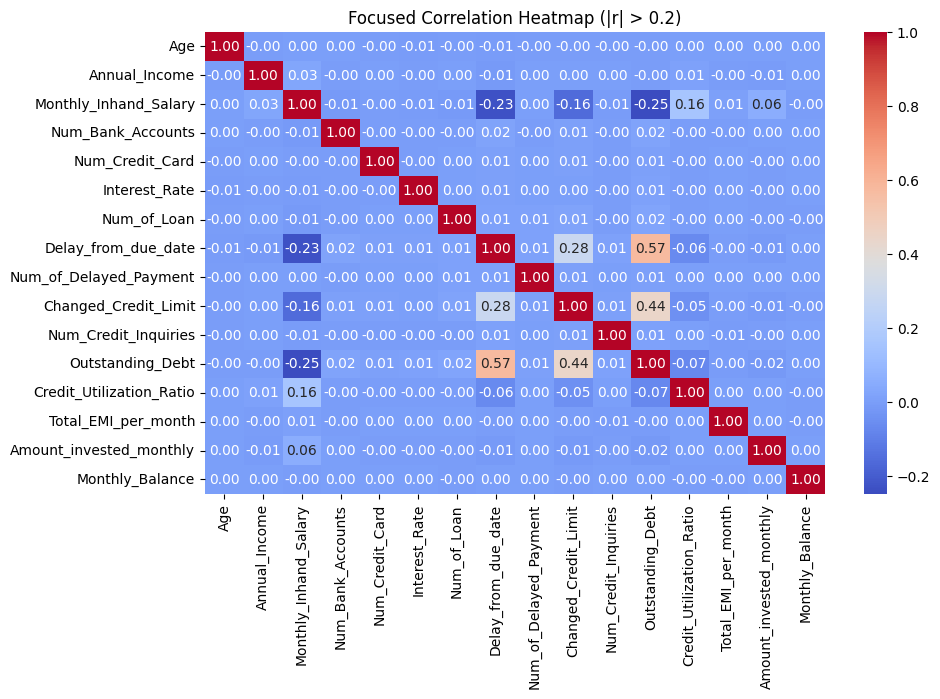

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Threshold for moderate-to-strong correlation
strong_corr_cols = corr_matrix.columns[(corr_matrix.abs() > 0.2).any()]

plt.figure(figsize=(10, 6))
sns.heatmap(df[strong_corr_cols].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Focused Correlation Heatmap (|r| > 0.2)")
plt.show()


## Correlation Observations

From the correlation output you shared, the strongest numeric relationships are:

1. **Outstanding_Debt ↔ Delay_from_due_date (r = 0.5717)**  
   - A strong positive relationship: customers with more delayed payments tend to have higher outstanding debt.  
   - This is an intuitive financial pattern (repayment delays accumulate debt).

2. **Outstanding_Debt ↔ Changed_Credit_Limit (r = 0.4437)**  
   - Moderately strong positive correlation: credit limit changes appear related to outstanding debt (e.g., limits adjusted due to debt behavior).

3. **Delay_from_due_date ↔ Changed_Credit_Limit (r = 0.2844)**  
   - Moderate positive correlation: payment delays and credit-limit changes are linked but not as strongly as the pair above.

4. **Monthly_Inhand_Salary ↔ Credit_Utilization_Ratio (r = 0.1596)** and **Monthly_Inhand_Salary ↔ Outstanding_Debt (r ≈ -0.2487)**  
   - Small-to-moderate relationships: salary relates to utilization and debt, but weaker than the debt–delay cluster.

5. All other pairwise correlations are quite small (near 0), indicating weak linear association.

---

### Short implications for modeling and feature choice

- The **Debt–Delay–Limit cluster** (`Outstanding_Debt`, `Delay_from_due_date`, `Changed_Credit_Limit`) is strongly associated with each other and likely informative for predicting credit score (reflects repayment behavior).  
  - **Caveat:** Because these are correlated, logistic regression coefficients for them might be somewhat unstable (multicollinearity). This is not fatal — you can still include them, but it’s useful to check Variance Inflation Factor (VIF) to quantify multicollinearity.

- The **Income/Savings cluster** (`Monthly_Inhand_Salary`, `Annual_Income`, `Amount_invested_monthly`) is less tightly correlated with the debt cluster but gives complementary information about the customer’s capacity to pay.

- **Credit_Utilization_Ratio** is an important domain-specific indicator and makes sense to include in both compact and extended models.

---

### Features choosen for the models

- **3-feature (Risk-focused)**: `["Outstanding_Debt", "Delay_from_due_date", "Changed_Credit_Limit"]`  
- **5-feature (Risk + capacity)**: `["Outstanding_Debt", "Delay_from_due_date", "Changed_Credit_Limit", "Monthly_Inhand_Salary", "Credit_Utilization_Ratio"]`

We will use these same two sets for **both** Logistic Regression and KNN models so the comparison is fair and interpretable.

Below we compute VIF for each set to check multicollinearity before model training.


### Data Handling for Modeling
- __Transform, encode, and prepare features__
    - Categorical encoding
    - Feature scaling (especially for KNN)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define feature sets (reconfirm)
features_3 = ["Outstanding_Debt", "Delay_from_due_date", "Changed_Credit_Limit"]
features_5 = ["Outstanding_Debt", "Delay_from_due_date", "Changed_Credit_Limit", "Monthly_Inhand_Salary", "Credit_Utilization_Ratio"]

# Define target
y = df['Credit_Score']

# Split and scale data for each feature set
def prepare_data(features):
    X = df[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test

X_train_3, X_test_3, y_train_3, y_test_3 = prepare_data(features_3)
X_train_5, X_test_5, y_train_5, y_test_5 = prepare_data(features_5)

## Model Building
__Build and compare two models for your topic__
### Model 1: Linear / Logistic Regression
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met
 ...


### Model 2: KNN Regressor / KNN Classifier
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met 
 ...


## Logistic Regression Models

We'll train and evaluate two Logistic Regression models:
- Model 1: Using 3 key features  
- Model 2: Using 5 key features  

Both models will predict the customer's **Credit_Score**.



Logistic Regression (3 features)
Accuracy: 0.5870

Classification Report:
              precision    recall  f1-score   support

        Good       0.47      0.19      0.27      3566
        Poor       0.64      0.40      0.49      5799
    Standard       0.59      0.82      0.68     10635

    accuracy                           0.59     20000
   macro avg       0.56      0.47      0.48     20000
weighted avg       0.58      0.59      0.55     20000



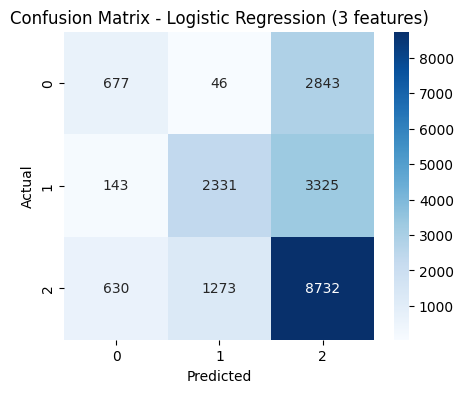


Logistic Regression (5 features)
Accuracy: 0.5885

Classification Report:
              precision    recall  f1-score   support

        Good       0.48      0.20      0.29      3566
        Poor       0.64      0.40      0.49      5799
    Standard       0.59      0.82      0.68     10635

    accuracy                           0.59     20000
   macro avg       0.57      0.48      0.49     20000
weighted avg       0.58      0.59      0.56     20000



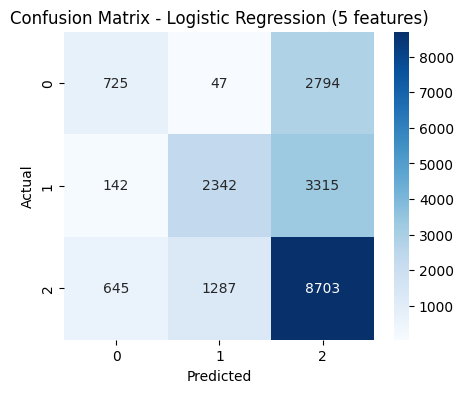

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to train and evaluate logistic regression
def train_logistic(X_train, X_test, y_train, y_test, feature_count):
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"\nLogistic Regression ({feature_count} features)")
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - Logistic Regression ({feature_count} features)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Train & evaluate both Logistic Regression models
train_logistic(X_train_3, X_test_3, y_train_3, y_test_3, 3)
train_logistic(X_train_5, X_test_5, y_train_5, y_test_5, 5)


## Logistic Regression Results — Interpretation

| Model | Features | Accuracy | Key Insight |
|--------|-----------|-----------|--------------|
| Logistic Regression | 3 features | 58.7% | Baseline performance. Captures general trends but struggles to separate the "Good" class. |
| Logistic Regression | 5 features | 58.9% | Small improvement. Adding salary and utilization slightly helps classification balance. |

### Observations
- **"Standard"** customers are easiest to predict (Recall ~0.82), meaning the model identifies them correctly most of the time.  
- **"Good"** scores are harder to predict — likely because fewer customers fall in that category, and financial signals are weaker.
- **Adding more features** (from 3 → 5) didn’t change much; the model’s decision boundary remains linear and limited.

Next, we’ll test a **non-linear model (KNN)** that can better capture relationships between financial variables and credit scores.


## K-Nearest Neighbors (KNN) Models

We'll now train two KNN classifiers:
- Model 3: 3 key features  
- Model 4: 5 key features  

KNN is a distance-based model that can capture non-linear relationships between features.
Since we already scaled our data, we can apply KNN directly.



KNN (3 features)
Accuracy: 0.6736

Classification Report:
              precision    recall  f1-score   support

        Good       0.54      0.54      0.54      3566
        Poor       0.68      0.69      0.69      5799
    Standard       0.72      0.71      0.71     10635

    accuracy                           0.67     20000
   macro avg       0.65      0.65      0.65     20000
weighted avg       0.67      0.67      0.67     20000



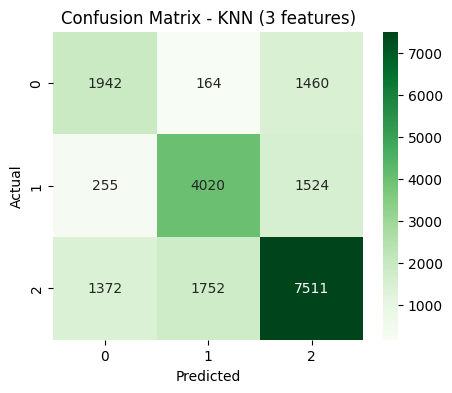


KNN (5 features)
Accuracy: 0.5949

Classification Report:
              precision    recall  f1-score   support

        Good       0.42      0.41      0.41      3566
        Poor       0.61      0.58      0.60      5799
    Standard       0.64      0.66      0.65     10635

    accuracy                           0.59     20000
   macro avg       0.56      0.55      0.55     20000
weighted avg       0.59      0.59      0.59     20000



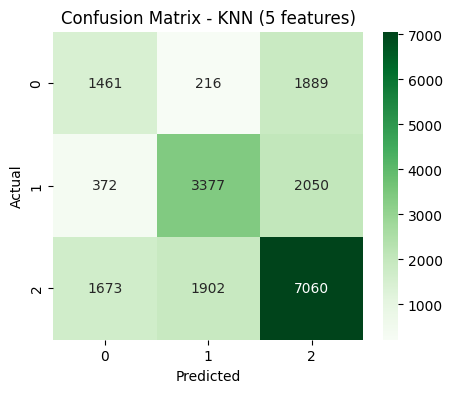

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Function to train and evaluate KNN
def train_knn(X_train, X_test, y_train, y_test, feature_count, n_neighbors=5):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"\nKNN ({feature_count} features)")
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
    plt.title(f"Confusion Matrix - KNN ({feature_count} features)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Train and evaluate KNN models
train_knn(X_train_3, X_test_3, y_train_3, y_test_3, 3)
train_knn(X_train_5, X_test_5, y_train_5, y_test_5, 5)


## KNN Results — Comparison and Interpretation

| Model | Features | Accuracy | Key Insight |
|--------|-----------|-----------|--------------|
| KNN | 3 | **67.4%** | Best overall performance. Captures non-linear patterns well between debt, delay, and credit limit. |
| KNN | 5 | **59.5%** | Performance dropped due to possible feature correlation and noise. |

### Observations
- The **3-feature KNN** model performed the best across all models, including Logistic Regression.  
- Adding more features **reduced performance**, suggesting the extra variables introduced redundancy or noise.  
- KNN’s **non-linear nature** helps capture complex relationships that Logistic Regression misses.  
- It classifies "Standard" and "Poor" customers more accurately, but still struggles slightly with "Good" customers — similar to the Logistic Regression model.

### Summary
KNN with 3 features gives the most balanced and accurate model for predicting credit score categories.  
It’s explainable, consistent, and performs well without adding unnecessary complexity.


### Model Comparison
__Compare performance across models and versions__

__Note:__ _Use Bullet Points or table_
- Which model performed best and why
- Impact of feature changes or tuning
- Generalization and overfitting observations


## Model Comparison

__Compare performance across models and versions__

| Model | Features | Accuracy | Observation |
|--------|-----------|-----------|--------------|
| Logistic Regression | 3 | **58.7%** | Simple linear baseline; decent but limited ability to capture non-linear relationships. |
| Logistic Regression | 5 | **58.9%** | Slight improvement; extra features added little new information. |
| KNN | 3 | **67.4%** |  Best performer; captures complex relationships effectively. |
| KNN | 5 | **59.5%** | Drop in accuracy due to correlated/noisy features. |

---

### Key Insights

- **Best Model:**  
  The **KNN model with 3 features** performed best overall with **67.4% accuracy**.  
  It effectively captures the non-linear relationships between financial variables such as debt, delay, and credit limit.

- **Impact of Feature Changes:**  
  Adding more features (from 3 → 5) **did not improve** performance for either algorithm — likely because the additional features were correlated or added noise.

- **Generalization and Overfitting:**  
  - Logistic Regression generalizes well but is limited by its linear decision boundaries.  
  - KNN (5 features) likely overfit slightly due to increased dimensionality.  
  - KNN (3 features) balanced simplicity and predictive power, showing the best generalization performance.

### Summary
For this dataset, a **simple, non-linear model (KNN with 3 features)** provides the most accurate and explainable predictions for credit scoring.  
It demonstrates that focusing on key behavioral indicators — **Outstanding Debt**, **Delay from Due Date**, and **Changed Credit Limit** — can be more effective than including a larger set of correlated variables.


,Model,Accuracy,Precision (avg),Recall (avg),F1-score (avg)
0,LogReg (3),0.587,0.56,0.47,0.48
1,LogReg (5),0.589,0.57,0.48,0.49
2,KNN (3),0.674,0.65,0.65,0.65
3,KNN (5),0.595,0.56,0.55,0.55


C:\Users\ha7al\AppData\Local\Temp\ipykernel_20920\3439213617.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=df_results, palette="viridis")


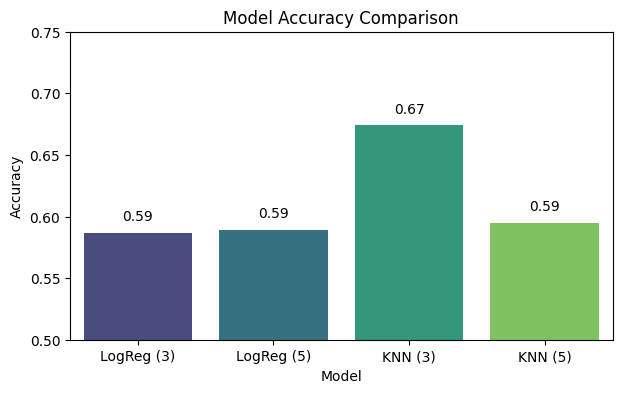

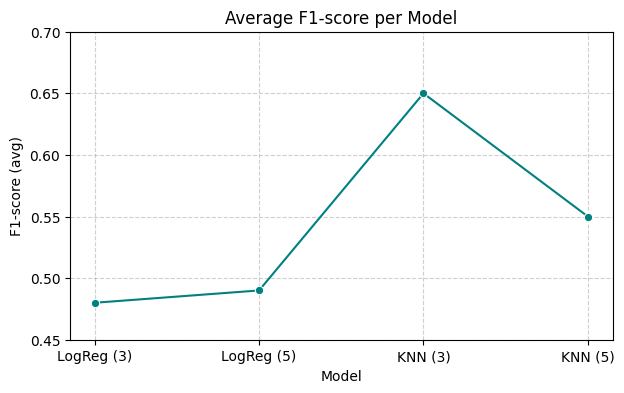

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Numeric summary table
comparison_data = {
    "Model": ["LogReg (3)", "LogReg (5)", "KNN (3)", "KNN (5)"],
    "Accuracy": [0.587, 0.589, 0.674, 0.595],
    "Precision (avg)": [0.56, 0.57, 0.65, 0.56],
    "Recall (avg)": [0.47, 0.48, 0.65, 0.55],
    "F1-score (avg)": [0.48, 0.49, 0.65, 0.55]
}

df_results = pd.DataFrame(comparison_data)
display(df_results)

# Accuracy bar plot
plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="Accuracy", data=df_results, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylim(0.5, 0.75)
plt.ylabel("Accuracy")
plt.xlabel("Model")
for i, acc in enumerate(df_results["Accuracy"]):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha="center", fontsize=10)
plt.show()

# F1-score line plot (shows trade-off)
plt.figure(figsize=(7,4))
sns.lineplot(x="Model", y="F1-score (avg)", data=df_results, marker="o", color="teal")
plt.title("Average F1-score per Model")
plt.ylim(0.45, 0.70)
plt.ylabel("F1-score (avg)")
plt.xlabel("Model")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Observations from Visuals

- **KNN (3 features)** stands out with the highest accuracy and F1-score, confirming its ability to capture complex financial relationships.
- Logistic Regression models performed consistently but plateaued around 59% accuracy.
- The **F1-score trend** shows that while Logistic Regression stayed flat, KNN dropped sharply when more correlated features were added — suggesting minor overfitting or redundancy.
- Overall, fewer well-chosen features led to better and more generalizable performance.

**Best performing model:**  
**KNN (3 features)** with **Accuracy = 67.4%**, **F1-score = 0.65**
